# 📘 Introduction

In this notebook, I explore and analyze the **College Student Management Dataset**, which contains detailed records of students, including their academic, demographic, and institutional information.

The dataset includes features such as:
- `student_id`, `name`, `gender`, `age`
- Academic details like `course`, `department`, `marks`, `attendance`
- Other variables such as `year`, `admission_date`, and more

## 🎯 Objective

The **target variable** in this dataset is `risk_level`, which categorizes students based on their academic and behavioral risk.  
The objective of this notebook is to **build a classification model** that can accurately predict a student’s risk level using the available features.

This notebook follows a complete machine learning pipeline:
- Data cleaning and preprocessing  
- Exploratory Data Analysis (EDA)  
- Feature engineering  
- Model training and evaluation  
- Final prediction of the `risk_level` for each student

Such a model can be valuable for educational institutions to identify at-risk students early and take timely interventions to support them.


## Importing Libraries Required

In [1]:
# Basic Libraries to for data analysis
import pandas as pd 
import numpy as np 

# Libraries for Visualization of Data
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to preprocess data 
from sklearn.preprocessing import StandardScaler,OneHotEncoder #Standardization , Encoding
from sklearn.model_selection import train_test_split #Splitting Data to train and test the dataset

# Classification Algorithms to predict target ( Risk Level )
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation Of Model
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

# For creating Pipeline and Column Transformer to Refine the Code
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Saving the Model in Hard disk in .pkl file format
import joblib

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading The Dataset and Inspecting It

In [2]:
df=pd.read_csv("college_student_management_data.csv")
df.head()

,student_id,age,gender,major,GPA,course_load,avg_course_grade,attendance_rate,enrollment_status,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,risk_level
0,S001,24,Other,Computer Science,2.42,5,67.2,0.71,Graduated,32,33,0.70,8,0.74,High
1,S002,21,Male,Arts,3.73,6,64.4,0.84,Leave,29,53,0.91,13,0.85,Medium
2,S003,22,Male,Computer Science,2.80,3,95.3,0.89,Graduated,34,69,0.58,18,0.99,Medium
3,S004,24,Male,Arts,2.59,4,73.7,0.98,Graduated,22,18,0.91,6,0.72,Medium
4,S005,20,Other,Computer Science,2.30,4,87.4,0.95,Active,9,11,0.77,15,0.76,High


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    1545 non-null   object 
 1   age                           1545 non-null   int64  
 2   gender                        1545 non-null   object 
 3   major                         1545 non-null   object 
 4   GPA                           1545 non-null   float64
 5   course_load                   1545 non-null   int64  
 6   avg_course_grade              1545 non-null   float64
 7   attendance_rate               1545 non-null   float64
 8   enrollment_status             1545 non-null   object 
 9   lms_logins_past_month         1545 non-null   int64  
 10  avg_session_duration_minutes  1545 non-null   int64  
 11  assignment_submission_rate    1545 non-null   float64
 12  forum_participation_count     1545 non-null   int64  
 13  vid

In [4]:
df.describe()

,age,GPA,course_load,avg_course_grade,attendance_rate,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,21.482848,3.012324,4.487379,79.914887,0.794460,19.344984,49.365049,0.752201,9.642718,0.750958
std,2.300287,0.571395,1.098163,11.528625,0.115142,11.515003,23.195192,0.144351,5.752493,0.144840
min,18.000000,2.000000,3.000000,60.000000,0.600000,0.000000,10.000000,0.500000,0.000000,0.500000
25%,19.000000,2.520000,4.000000,69.900000,0.690000,10.000000,29.000000,0.630000,5.000000,0.620000
50%,22.000000,3.030000,5.000000,79.600000,0.790000,19.000000,49.000000,0.760000,10.000000,0.750000
75%,23.000000,3.510000,5.000000,89.700000,0.890000,29.000000,70.000000,0.880000,15.000000,0.880000
max,25.000000,4.000000,6.000000,100.000000,1.000000,39.000000,89.000000,1.000000,19.000000,1.000000


### Check For Values and Duplicates

In [5]:
df.isnull().sum()

student_id                      0
age                             0
gender                          0
major                           0
GPA                             0
course_load                     0
avg_course_grade                0
attendance_rate                 0
enrollment_status               0
lms_logins_past_month           0
avg_session_duration_minutes    0
assignment_submission_rate      0
forum_participation_count       0
video_completion_rate           0
risk_level                      0
dtype: int64

In [6]:
any(df.duplicated())

False

## Explorartory Data Analysis **EDA**

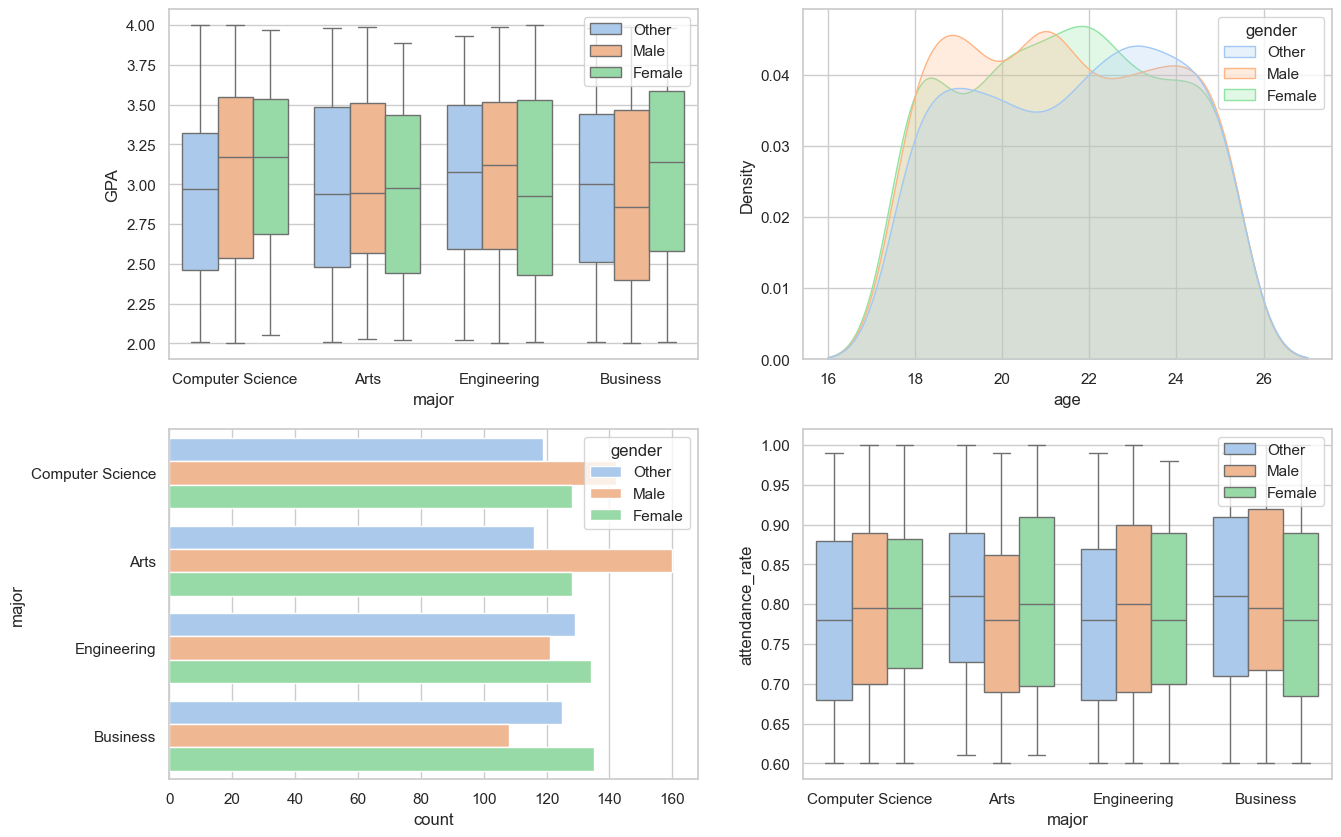

In [7]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(data=df,x="major",y="GPA",hue="gender",palette="pastel")
plt.legend(loc="upper right")
plt.subplot(2,2,2)
sns.kdeplot(data=df,x="age",hue='gender',fill=True,palette="pastel")
plt.subplot(2,2,3)
sns.countplot(data=df,y="major",hue="gender",palette="pastel")
plt.subplot(2,2,4)
sns.boxplot(data=df,x="major",y="attendance_rate",hue="gender",palette="pastel")
plt.legend(loc="upper right")

plt.show()

## 📊 Insights from Data Visualization

- **Girls and Other Gender students are performing significantly better than Boys in the Business major.**
- **In Engineering, Girls tend to score slightly lower compared to Boys and Other Gender students.**
- **Overall, Boys and Girls outperform Other Gender students across most majors.**
- **In the Arts major, all genders show similar academic performance, indicating balanced outcomes.**

- **Since the dataset represents college students, most of them fall within the age range of 18 to 25.**
- **A higher number of Male students have enrolled in Computer Science and Arts majors.**
- **In Engineering and Business, Female and Other Gender students show similar levels of enrollment.**


# Feature Engineering 🤖

In [8]:
# Dropping the "student_id" column because it is irrelevant for model training

df.drop("student_id",inplace=True,axis=1)
df.head()

,age,gender,major,GPA,course_load,avg_course_grade,attendance_rate,enrollment_status,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,risk_level
0,24,Other,Computer Science,2.42,5,67.2,0.71,Graduated,32,33,0.70,8,0.74,High
1,21,Male,Arts,3.73,6,64.4,0.84,Leave,29,53,0.91,13,0.85,Medium
2,22,Male,Computer Science,2.80,3,95.3,0.89,Graduated,34,69,0.58,18,0.99,Medium
3,24,Male,Arts,2.59,4,73.7,0.98,Graduated,22,18,0.91,6,0.72,Medium
4,20,Other,Computer Science,2.30,4,87.4,0.95,Active,9,11,0.77,15,0.76,High


In [9]:
# Splitting the data into independent and dependent features
X= df.drop("risk_level",axis=1)  # Independent Features
y=df["risk_level"]               # Dependent Target Feature

# Preprocessing The Features 
- Encoding Of Categorical Features
- Standardization Of The Numerical Features
- Splitting Data into Training Set and Test Set

In [10]:
categorical=[col for col in X.columns if df[col].dtype=='O']
numerical=[col for col in X.columns if df[col].dtype!='O']

In [11]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print(f"No. of Unique cat. in {i} : {df[i].nunique()}")
    print("="*35)

gender
['Other' 'Male' 'Female']
No. of Unique cat. in gender : 3
major
['Computer Science' 'Arts' 'Engineering' 'Business']
No. of Unique cat. in major : 4
enrollment_status
['Graduated' 'Leave' 'Active']
No. of Unique cat. in enrollment_status : 3


In [12]:
# Mapping Throughout The Target Feature (y array) To Encode It
y=y.map({"Low":0,"Medium":1,"High":2})
# Implementing One Hot Encoding On  All Categorical Features
oh=OneHotEncoder(sparse_output=False)
d=oh.fit_transform(X[categorical])

# Concatinating The Encoded Features 
X_encoded=pd.concat([X.drop(columns=categorical,axis=1),pd.DataFrame(d,columns=oh.get_feature_names_out(categorical))],axis=1)

# Splitting The data Into Train and Test Data 
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)

# Standardizing The Numerical Data 
scaler=StandardScaler()
X_train[numerical]=scaler.fit_transform(X_train[numerical])  # Fitting The Scaler Standardizer For Training Data and Transforming It
X_test[numerical]=scaler.transform(X_test[numerical])        # Transforming The test data ( Do Not Fit It To Prevent Data Leakage)

# **.** Training The Different Models 
# **.** Evaluating And Selecting The Best Model

In [13]:
# Automating The Process Of Training And Evaluation

# Models That Can Be Used For Classification Problems
models={
    'LogReg':LogisticRegression(multi_class='multinomial', solver='lbfgs'),
    'KNN':KNeighborsClassifier(),
    'DecTree':DecisionTreeClassifier(random_state=42),
    'RanForest':RandomForestClassifier(random_state=42)
}

# Evaluation And Selecting The Best Model 
for name,model in models.items():                                 # Iterating Through Each Model 
    model.fit(X_train,y_train)                                    # Training The Model
    y_pred=model.predict(X_test)                                          
    accuracy=accuracy_score(y_test,y_pred)                    
    precision=precision_score(y_test,y_pred,average="weighted")
    recall=recall_score(y_test,y_pred,average="weighted")
    classification=classification_report(y_test,y_pred)

    # Evaluation Of Models And Selecting The Best One Out 
    print(name)
    print("Accuracy :",accuracy)
    print("Precision :",precision)
    print("Recall :",recall)
    print("^"*39)
    print("Classification Report :\n",classification)
    print("v"*39)
    print("="*45)

LogReg
Accuracy : 0.7958656330749354
Precision : 0.7977988596300559
Recall : 0.7958656330749354
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        65
           1       0.62      0.64      0.63       106
           2       0.87      0.86      0.87       216

    accuracy                           0.80       387
   macro avg       0.78      0.78      0.78       387
weighted avg       0.80      0.80      0.80       387

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
KNN
Accuracy : 0.7596899224806202
Precision : 0.76921506946785
Recall : 0.7596899224806202
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.69      0.72        65
           1       0.57      0.64      0.60       106
           2       0.87      0.84      0.86       216

    accuracy                           0.76 

## ✅ Observation

- Among all the models tested, **Decision Tree** and **Random Forest** performed the best in predicting the `risk_level`.

## 🏁 Final Model Selection

🔍 For the final deployment and evaluation, I will proceed with the **Random Forest Classifier** as it provides the best balance between **performance, interpretability, and robustness**.


## ⚙️ Creating a Pipeline using `ColumnTransformer` and `Pipeline` from Scikit-learn

To streamline the preprocessing and modeling steps, we build a machine learning pipeline using:

- `ColumnTransformer`: to apply different preprocessing steps to numerical and categorical features.
- `Pipeline`: to chain preprocessing and modeling steps into a single, manageable workflow.

This ensures cleaner code, reduces the risk of data leakage, and makes the entire process more reproducible and scalable.

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

# Define transformers
scaler=StandardScaler()
oh_encoder=OneHotEncoder(sparse_output=False)

# Define ColumnTransformer for preprocessing
preprocessor = ColumnTransformer([
    ("OneHotEncoder",oh_encoder,categorical),
    ("Standardization",scaler,numerical)
])
# Create the final pipeline with preprocessing + model
final_pipeline=Pipeline(
[("Column Transformer",preprocessor),
("RandomForest",RandomForestClassifier(random_state=42))]
)

# Fit the pipeline to training data
final_pipeline.fit(X_train, y_train)

,steps,"[('Column Transformer', ...), ('RandomForest', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('OneHotEncoder', ...), ('Standardization', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [15]:
# Predict on test data
y_pred = final_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
report = classification_report(y_test, y_pred)

# Display results
print("="*45)
print("✅ Model Evaluation Metrics")
print("-" * 45)
print(f"🔹 Accuracy  : {accuracy:.4f}")
print(f"🔹 Precision : {precision:.4f}")
print(f"🔹 Recall    : {recall:.4f}")
print("-" * 45)
print("📄 Classification Report:\n")
print(report)
print("="*45)

✅ Model Evaluation Metrics
---------------------------------------------
🔹 Accuracy  : 1.0000
🔹 Precision : 1.0000
🔹 Recall    : 1.0000
---------------------------------------------
📄 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       106
           2       1.00      1.00      1.00       216

    accuracy                           1.00       387
   macro avg       1.00      1.00      1.00       387
weighted avg       1.00      1.00      1.00       387



## ✅ Final Step: Saving the Model

The model is now fully trained and ready for deployment.  
The only step remaining is to **save it to disk** so it can be reused later without retraining.

We'll use the `joblib` library to save the complete pipeline — including both preprocessing and the trained model.


In [ ]:
# Save the trained pipeline to a file
joblib.dump(final_pipeline, "FirstPipeline.pkl")

print("✅ Pipeline saved successfully as 'FirstPipeline.pkl'")

✅ Pipeline saved successfully as 'FirstPipeline.pkl'
